# UN Data Exploration Bonus Bonus for NSS Data Science - Abigail Ezell

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gdp_df=pd.read_csv("../data/gdp_per_capita.csv")

In [4]:
gdp_df = (
    gdp_df
    .drop(columns='Value Footnotes')
    .rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
)

In [5]:
gdp_df['Country'] = gdp_df['Country'].astype("string")

In [6]:
continents=pd.read_csv("../data/continents.csv")

In [7]:
gdp_df=gdp_df.merge(continents, how='inner', on='Country')

In [8]:
life_expectancy=pd.read_csv("../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_22997.csv",skiprows=4)

In [9]:
life_expectancy = (
    life_expectancy
    .drop(columns=['Country Code', 'Indicator Name','Indicator Code'])
    .melt(id_vars='Country Name')
    .rename(columns={'Country Name':'Country','variable':'Year','value':'Life_Expectancy'})
)

In [10]:
# I'll convert both 'Year' and 'Country' to string in both dataframes
gdp_df['Year'] = gdp_df['Year'].astype("string")
life_expectancy['Year'] = life_expectancy['Year'].astype("string")
# I'll convert Country to string in life_expectancy
life_expectancy['Country'] = life_expectancy['Country'].astype("string")

In [11]:
# Merge gdp_df and life_expectancy on country and year columns
gdp_le=gdp_df.merge(life_expectancy, on=['Country','Year'], how='inner')
# Merged dataframe was initially coming out as blank; checking to make sure there are no trailing or leading spaces
gdp_df['Country']=gdp_df['Country'].str.strip()
life_expectancy['Country']=life_expectancy['Country'].str.strip()
gdp_df['Year']=gdp_df['Year'].str.strip()
life_expectancy['Year']=life_expectancy['Year'].str.strip()
# Sort by year and country in ascending order
gdp_le=gdp_le.sort_values(by=['Country', 'Year'], ascending=[True, True])

In [20]:
print(gdp_le)

          Country  Year  GDP_Per_Capita Continent  Life_Expectancy
23    Afghanistan  2000     1617.826475      Asia           55.005
22    Afghanistan  2001     1454.110782      Asia           55.511
21    Afghanistan  2002     1774.308743      Asia           56.225
20    Afghanistan  2003     1815.928200      Asia           57.171
19    Afghanistan  2004     1776.918207      Asia           57.810
...           ...   ...             ...       ...              ...
5826     Zimbabwe  2019     3294.806084    Africa           61.060
5825     Zimbabwe  2020     2987.269823    Africa           61.530
5824     Zimbabwe  2021     3184.785451    Africa           60.135
5823     Zimbabwe  2022     3323.121932    Africa           62.360
5822     Zimbabwe  2023     3442.251327    Africa           62.775

[5856 rows x 5 columns]


In this question, we'll compare life expectancy by decade. \
a. Start by creating a decade column using the pandas cut function. \
b. Then use the pivot_table method to calculate the median life expectancy by continent by decade. \
c. Use .loc to select the median life expectancy for Asia in the 2000s. Hint: you may need to inspect the decade indicator. \
d. Create a heatmap of median GDP per capita for each continent over time using the pivot table you created and a seaborn heatmap.

In [43]:
gdp_le['Year'] = gdp_le['Year'].astype("int16")
gdp_le['Decade']= (
    pd.cut(gdp_le['Year'], 
    bins=[1990,1999,2009,2019,2023],
    labels=['1990s','2000s','2010s','2020s'], 
    include_lowest=True
          )
)
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Decade
23,Afghanistan,2000,1617.826475,Asia,55.005,2000s
22,Afghanistan,2001,1454.110782,Asia,55.511,2000s
21,Afghanistan,2002,1774.308743,Asia,56.225,2000s
20,Afghanistan,2003,1815.928200,Asia,57.171,2000s
19,Afghanistan,2004,1776.918207,Asia,57.810,2000s
...,...,...,...,...,...,...
5826,Zimbabwe,2019,3294.806084,Africa,61.060,2010s
5825,Zimbabwe,2020,2987.269823,Africa,61.530,2020s
5824,Zimbabwe,2021,3184.785451,Africa,60.135,2020s
5823,Zimbabwe,2022,3323.121932,Africa,62.360,2020s


In [42]:
le_pivot = (
    gdp_le
    .pivot_table(index='Continent',columns='Decade',values='Life_Expectancy',aggfunc='median',observed=False)
)
le_pivot

Decade,1990s,2000s,2010s,2020s
Continent,,,,
Africa,53.1830,55.550000,61.564000,63.9505
Asia,67.6185,69.309720,73.335500,73.9035
Europe,74.9460,77.552439,80.241463,80.4340
North America,70.7395,71.914000,72.983000,73.4105
Oceania,65.9015,66.333500,68.912000,68.6890
South America,68.7680,72.186000,75.224000,73.8960


In [46]:
#Use .loc to select the median life expectancy for Asia in the 2000s
med_le_asia_2000s=le_pivot.loc['Asia','2000s'].round(2)
print(f'The median life expectancy for Asia in the 2000s was {med_le_asia_2000s}.')

The median life expectancy for Asia in the 2000s was 69.31.


<Axes: xlabel='Decade', ylabel='Continent'>

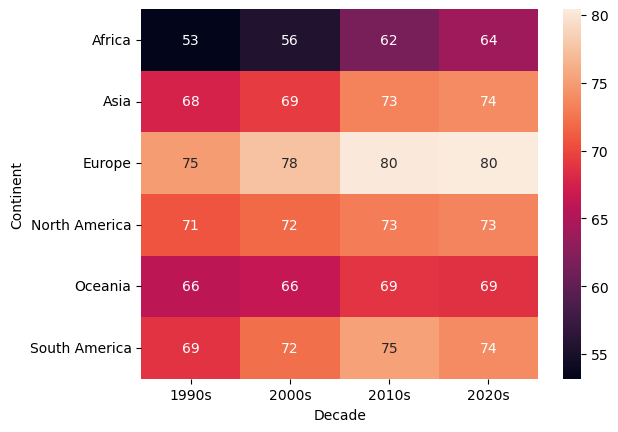

In [54]:
#Create a heatmap of median life expectancy for each continent over time using the pivot table you created
sns.heatmap(le_pivot, annot=True)

In this question, you'll assign a rank based on GDP Per Capita.\
a. For each year, create a column gdp_rank that ranks countries by GDP per capita (highest GDP = rank 1). \
b. Using your rank column, find the top 5 ranked countries for GDP for the years 1990, 2000, 2010, and 2020. \
c. Using the pivot method, reshape the data from the pervious part to get a table with one row per year and one column per rank. Why doesn't pivot_table work here? \
d. Identify the top 3 countries whose GDP rank improved the most from 2000 to 2010. Find the countries, their ranks in 2000 and 2010, and the change in ranks. \
e. Filter to 2010. Assign each country to a GDP quintile using pd.qcut. Then compute the median life expectancy for each quintile in 2010.

In [56]:
gdp_le['GDP_Rank']=gdp_le.groupby('Year')['GDP_Per_Capita'].rank(ascending=False)

In [88]:
#find the top 5 ranked countries for GDP for the years 1990, 2000, 2010, and 2020
top_ranked_gdp = (
    gdp_le[gdp_le['Year'].isin([1990,2000,2010,2020])]
    .nsmallest(20, 'GDP_Rank', keep='all')
    .sort_values(by=['Year','GDP_Rank'])
)
#messing with styling to see the years better
styled_top_ranked_gdp = top_ranked_gdp.style.background_gradient(cmap='viridis', subset=['GDP_Rank','Year'],axis='index')
styled_top_ranked_gdp

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Decade,GDP_Rank
5587,United Arab Emirates,1990,108057.042464,Asia,71.074000,1990s,1.000000
3092,Luxembourg,1990,80947.492013,Europe,74.775488,1990s,2.000000
669,Bermuda,1990,79109.890650,North America,73.952000,1990s,3.000000
4377,Qatar,1990,71584.446629,Asia,73.405000,1990s,4.000000
5146,Switzerland,1990,63905.426895,Europe,77.242439,1990s,5.000000
3082,Luxembourg,2000,113436.588273,Europe,77.873171,2000s,1.000000
659,Bermuda,2000,97236.248931,North America,78.251000,2000s,2.000000
4367,Qatar,2000,93187.062856,Asia,75.250000,2000s,3.000000
5577,United Arab Emirates,2000,92547.229037,Asia,76.347000,2000s,4.000000
3993,Norway,2000,77517.159157,Europe,78.634146,2000s,5.000000


In [ ]:
#Using the pivot method, reshape the data from the previous part to get a table with one row per year and one column per rank. 
#Why doesn't pivot_table work here?
top_ranked_gdp.pivot_table(index='Year',columns='GDP_Rank',values='GDP_Per_Capita

In [90]:
#Using the pivot method, reshape the data from the pervious part to get a table with one row per year and one column per rank. 
top_ranked_gdp.pivot_table(index='Year',columns='GDP_Rank',values='GDP_Per_Capita')

GDP_Rank,1.0,2.0,3.0,4.0,5.0
Year,,,,,
1990,108057.042464,80947.492013,79109.890650,71584.446629,63905.426895
2000,113436.588273,97236.248931,93187.062856,92547.229037,77517.159157
2010,130620.266278,130596.059759,129045.005599,105121.639689,95043.963882
2020,128256.560341,115304.149459,103061.913414,102989.787335,87894.401174


In [92]:
# Pivot table doesn't work here because it's automatically trying to calculate the mean for the values, but in this case our values are not numerical
# Pivot is a reshaping operation, while pivot_table is an aggregation, so we'd need to use pivot in this case
top_ranked_gdp.pivot(index='Year',columns='GDP_Rank',values='Country')

GDP_Rank,1.0,2.0,3.0,4.0,5.0
Year,,,,,
1990,United Arab Emirates,Luxembourg,Bermuda,Qatar,Switzerland
2000,Luxembourg,Bermuda,Qatar,United Arab Emirates,Norway
2010,Luxembourg,"Macao SAR, China",Qatar,Bermuda,Singapore
2020,Luxembourg,Singapore,Qatar,Ireland,Bermuda


In [134]:
#Identify the top 3 countries whose GDP rank improved the most from 2000 to 2010. 
year_range=[2000,2010]
top_3_gdp_jump_agg = (
    gdp_le[gdp_le['Year'].isin(year_range)]
    .groupby('Country')
    .agg({'GDP_Rank':'diff'})
    .nsmallest(3,'GDP_Rank')
)


In [135]:
top_3_gdp_jump_agg

,GDP_Rank
377,-45.0
1595,-33.0
513,-25.0


In [136]:
top_3_gdp_jump_info=gdp_le[gdp_le.index.isin(top_3_gdp_jump_agg.index)]

In [137]:
top_3_gdp_jump_info

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Decade,GDP_Rank
377,Azerbaijan,2010,19621.384345,Europe,70.309000,2010s,67.0
513,Belarus,2010,24012.613298,Europe,70.404878,2010s,58.0
1595,Equatorial Guinea,2010,33668.874065,Africa,58.344000,2010s,43.0


In [147]:
#Find the countries, their ranks in 2000 and 2010, and the change in ranks.
for index in top_3_gdp_jump_agg.index :
    jump=top_3_gdp_jump_agg.loc[index,'GDP_Rank']*-1
    country=gdp_le.loc[index,'Country']
    rank_2010=gdp_le.loc[index,'GDP_Rank']
    rank_2000=gdp_le.loc[(gdp_le['Country']==country) & (gdp_le['Year']==year_range[0]), 'GDP_Rank'].item()
    print(f'{country} had a rank of {rank_2000} in 2000 and a rank of {rank_2010} in 2010 (increase of {jump}).')

Azerbaijan had a rank of 112.0 in 2000 and a rank of 67.0 in 2010 (increase of 45.0).
Equatorial Guinea had a rank of 76.0 in 2000 and a rank of 43.0 in 2010 (increase of 33.0).
Belarus had a rank of 83.0 in 2000 and a rank of 58.0 in 2010 (increase of 25.0).


In [161]:
#Filter to 2010. Assign each country to a GDP quintile using pd.qcut. Then compute the median life expectancy for each quintile in 2010.
gdp_le_2010=gdp_le[gdp_le['Year']==2010]
gdp_le_2010['GDP_Quintile'] = pd.qcut(gdp_le_2010['GDP_Per_Capita'], q=5)
gdp_le_2010.pivot_table(index='Year',columns='GDP_Quintile',values='Life_Expectancy',aggfunc='median')

/var/folders/51/zgq0lbb14t13h0_bgn8nntnm0000gn/T/ipykernel_6101/678713890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2010['GDP_Quintile'] = pd.qcut(gdp_le_2010['GDP_Per_Capita'], q=5)
/var/folders/51/zgq0lbb14t13h0_bgn8nntnm0000gn/T/ipykernel_6101/678713890.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  gdp_le_2010.pivot_table(index='Year',columns='GDP_Quintile',values='Life_Expectancy',aggfunc='median')


GDP_Quintile,"(947.62, 3985.93]","(3985.93, 9862.806]","(9862.806, 18789.66]","(18789.66, 39186.918]","(39186.918, 130620.266]"
Year,,,,,
2010,59.358,68.50561,73.029585,74.297,80.743902


In this question, we'll look for countries that had a lot of volatility in their gdp per capita. \
a. First, for each country, find the 3-year rolling average and 3-year rolling standard deviation of GDP per capita. \
b. Because there is a wide range of GDP per capita values, just looking at standard deviation may not be the best way to assess variability. Instead, we can use the coefficient of variation. Calculate the rolling coefficient of variation by dividing the rolling standard deviation by the rolling mean. \
c. Which countries have experienced the highest volatility, on the basis of the coefficient of variation?

In [165]:
#for each country, find the 3-year rolling average and 3-year rolling standard deviation of GDP per capita
rolling_mean=gdp_le.groupby('Country')['GDP_Per_Capita'].rolling(3).mean()
rolling_stddev=gdp_le.groupby('Country')['GDP_Per_Capita'].rolling(3).std()

In [166]:
#Calculate the rolling coefficient of variation by dividing the rolling standard deviation by the rolling mean.
rolling_coef=rolling_stddev/rolling_mean

In [168]:
rolling_coef.nlargest(5)

Country                
Equatorial Guinea  1608    0.699113
Iraq               2429    0.572698
Georgia            1884    0.496354
Equatorial Guinea  1607    0.464592
Liberia            2987    0.457854
Name: GDP_Per_Capita, dtype: float64

*Equatorial Guinea, Iraq, and Georgia have the highest 3 year rolling coefficients of variation, indicating a high amount of GDP volatility.*

Finally, we'll look at how the life expectancy of a country compares to the life expectancy of other countries in their same continent.\
a. Create a new column life_expectancy_category that classifies each country-year as: 
* “Low” if life expectancy is in the bottom third of life expectancies for that continent in that year
* “Medium” if life expectancy is in the middle third of life expectancies for that continent in that year
* “High” if life expectancy is in the top third of life expectancies for that continent in that year 

b. Ethiopia was in the low category in 1996 but by 2018 had made it into the High category. How many countries have gone from a Low category to a High category in a later year? How many have gone from a High category to a Low category in a later year?